# Лекция 1


In [1]:
import pandas as pd
import numpy as np

In [2]:
np.set_printoptions(precision = 2)

In [3]:
data=pd.read_csv('beauty.csv', sep=';')
data.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [4]:
data.shape

(1260, 10)

In [5]:
data.info()#есть инфа об отсутствии пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [6]:
data.describe()#статистика по признакам

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


In [7]:
data['exper'].head()#проиндексированный список с меткой

0    30
1    28
2    35
3    38
4    27
Name: exper, dtype: int64

# loc и iloc


In [8]:
data.loc[0:5, ['wage', 'female']]#срез по строкам и столбцавм

,wage,female
0,5.73,1
1,4.28,1
2,7.96,1
3,11.57,0
4,11.42,0
5,3.91,1


In [9]:
data.iloc[:,2:4]#геометрическая индексация

,union,goodhlth
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1255,0,1
1256,0,1
1257,0,1
1258,0,1


In [10]:
data[data['female'] == 1]['wage'].mean() #ско женшин с доходом

4.299357798165136

In [11]:
data[data['female'] == 0]['wage'].mean() #ско мужчин с доходом

7.3688228155339734

In [12]:
data[(data['female'] == 0) & (data['married']==1)]['wage'].median()
#медиана женатых мужчин с доходом

6.710000000000001

In [13]:
data[(data['female'] == 0) & (data['married']==0)]['wage'].median() 
#медианы неженатых мужчин с доходом

5.0649999999999995

In [24]:
for look, sub_df in data.groupby('looks'):  #смотрим по уникальным значениям признака привлекательности
    print(look)
    print(sub_df['female'].mean())

1
0.38461538461538464
2
0.38028169014084506
3
0.32271468144044324
4
0.37362637362637363
5
0.42105263157894735


In [27]:
#среднее для признаков доход и опыт работы для уникальных значений looks
data.groupby('looks')['wage', 'exper'].agg(np.median)

C:\Users\ivan\AppData\Local\Temp\ipykernel_7404\3077299136.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('looks')['wage', 'exper'].agg(np.median)


,wage,exper
looks,,
1,3.460,32.0
2,4.595,18.0
3,5.635,18.0
4,5.240,12.5
5,4.810,8.0


In [28]:
pd.crosstab(data['female'], data['married']) #сводная таблица женат/неженат

married,0,1
female,,
0,166,658
1,223,213


In [29]:
pd.crosstab(data['female'], data['looks']) #для женщин и рейтину привлекательносчти

looks,1,2,3,4,5
female,,,,,
0,8,88,489,228,11
1,5,54,233,136,8


In [31]:
data['wage'].describe()

count    1260.000000
mean        6.306690
std         4.660639
min         1.020000
25%         3.707500
50%         5.300000
75%         7.695000
max        77.720000
Name: wage, dtype: float64

In [32]:
data['is_rich'] = (data['wage'] > data['wage'].quantile(.75))

In [34]:
(data['wage'] > data['wage'].quantile(.75)).astype('int64') #новый признак по доходу

0       0
1       0
2       1
3       1
4       1
       ..
1255    0
1256    0
1257    0
1258    0
1259    0
Name: wage, Length: 1260, dtype: int64

In [35]:
data.head()#таблица с новым признаком

,wage,exper,union,goodhlth,black,female,married,service,educ,looks,is_rich
0,5.73,30,0,1,0,1,1,1,14,4,False
1,4.28,28,0,1,0,1,1,0,12,3,False
2,7.96,35,0,1,0,1,0,0,10,4,True
3,11.57,38,0,1,0,0,1,1,16,3,True
4,11.42,27,0,1,0,0,1,0,16,3,True


In [36]:
data['rubbish'] = 0.56*data['wage']+0.32*data['exper']
#неосмысленный признак, может повышать качество выборки

In [38]:
data.apply(np.mean) #применяем mean ко всем столбцам

wage         6.306690
exper       18.206349
union        0.272222
goodhlth     0.933333
black        0.073810
female       0.346032
married      0.691270
service      0.273810
educ        12.563492
looks        3.185714
is_rich      0.250000
rubbish      9.357778
dtype: float64

In [41]:
def string_gender(female):
    return 'female' if female else 'male'

In [42]:
string_gender(0)

'male'

In [43]:
data['female'].apply(string_gender)

0       female
1       female
2       female
3         male
4         male
         ...  
1255    female
1256    female
1257    female
1258    female
1259    female
Name: female, Length: 1260, dtype: object

In [45]:
#то же через лямбда функцию
data['female'].apply(lambda female: 'female' if female else 'male')

0       female
1       female
2       female
3         male
4         male
         ...  
1255    female
1256    female
1257    female
1258    female
1259    female
Name: female, Length: 1260, dtype: object

In [47]:
dic = {1: 'union', 0: 'non-union'}
data['union'].map(dic).head()

0    non-union
1    non-union
2    non-union
3    non-union
4    non-union
Name: union, dtype: object

# отток клиентов

In [1]:
df = pd.read_csv('telecom_churn.csv')
df.head()

NameError: name 'pd' is not defined

In [50]:
df.shape

(3333, 20)

In [52]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [53]:
df.sort_values(by = 'Total day charge', ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,True
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,True
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,True


# Лекция 2: Визуализация

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('telecom_churn.csv')

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 1. Признаки по одному

## 1.1. Количественный признак

<AxesSubplot:>

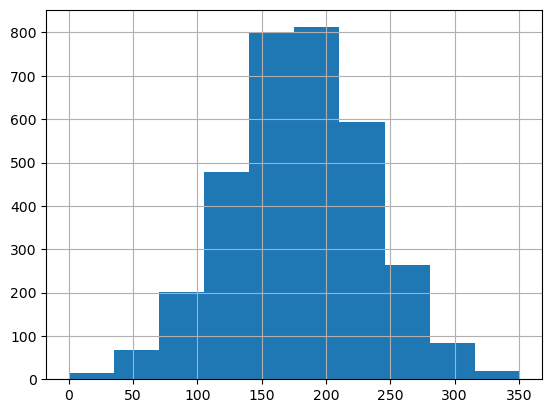

In [5]:
df['Total day minutes'].hist()

<AxesSubplot:>

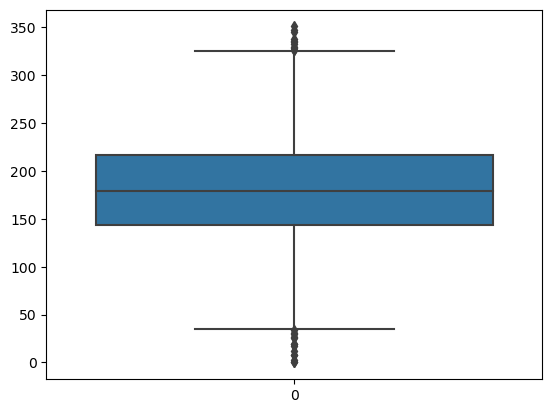

In [6]:
sns.boxplot(df['Total day minutes'])

array([[<AxesSubplot:title={'center':'Account length'}>,
        <AxesSubplot:title={'center':'Area code'}>,
        <AxesSubplot:title={'center':'Number vmail messages'}>,
        <AxesSubplot:title={'center':'Total day minutes'}>],
       [<AxesSubplot:title={'center':'Total day calls'}>,
        <AxesSubplot:title={'center':'Total day charge'}>,
        <AxesSubplot:title={'center':'Total eve minutes'}>,
        <AxesSubplot:title={'center':'Total eve calls'}>],
       [<AxesSubplot:title={'center':'Total eve charge'}>,
        <AxesSubplot:title={'center':'Total night minutes'}>,
        <AxesSubplot:title={'center':'Total night calls'}>,
        <AxesSubplot:title={'center':'Total night charge'}>],
       [<AxesSubplot:title={'center':'Total intl minutes'}>,
        <AxesSubplot:title={'center':'Total intl calls'}>,
        <AxesSubplot:title={'center':'Total intl charge'}>,
        <AxesSubplot:title={'center':'Customer service calls'}>]],
      dtype=object)

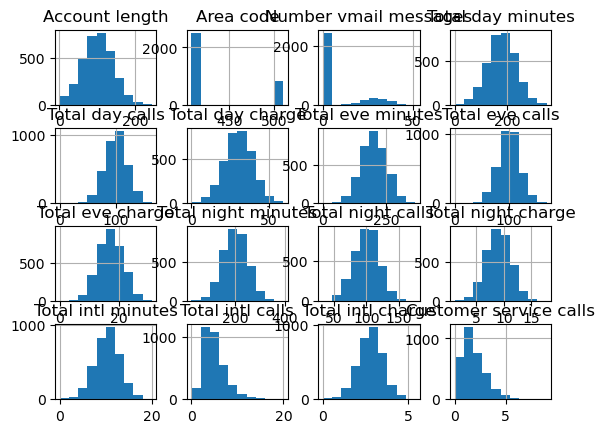

In [7]:
df.hist()

## 1.2 Категориальные признаки

In [8]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [9]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

<AxesSubplot:>

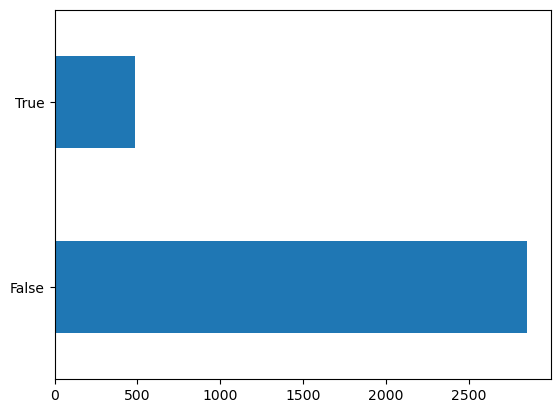

In [10]:
#sns.countplot(df['Churn'])
df['Churn'].value_counts().plot(kind='barh')

In [11]:
df['State'].value_counts().head().index #5 самых поулярных штатов

Index(['WV', 'MN', 'NY', 'AL', 'WI'], dtype='object')

<AxesSubplot:>

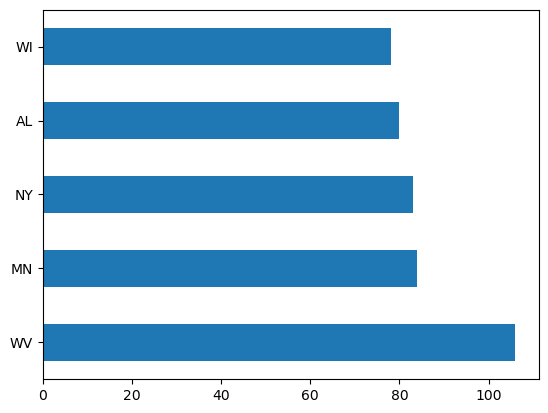

In [12]:
df['State'].value_counts().head().plot(kind='barh')

<AxesSubplot:>

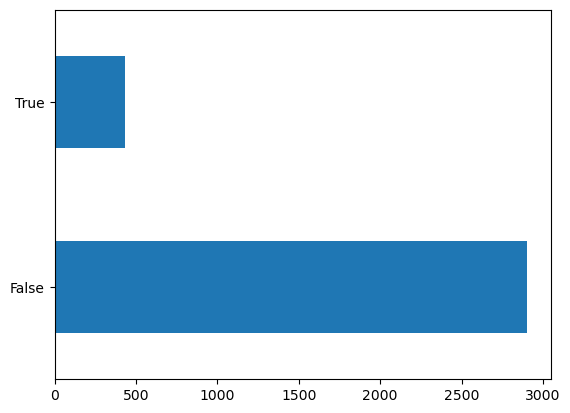

In [35]:
#sns.countplot(df[df['State'].isin(df['State'].value_counts().head().index)])['State']
df['State'].isin(df['State'].value_counts().head().index).value_counts().plot(kind='barh')

## 2 Взаимодействие признаков


## 2.1 Колич.-колич

array([[<AxesSubplot:title={'center':'Total day charge'}>,
        <AxesSubplot:title={'center':'Total eve charge'}>],
       [<AxesSubplot:title={'center':'Total night charge'}>,
        <AxesSubplot:title={'center':'Total intl charge'}>]], dtype=object)

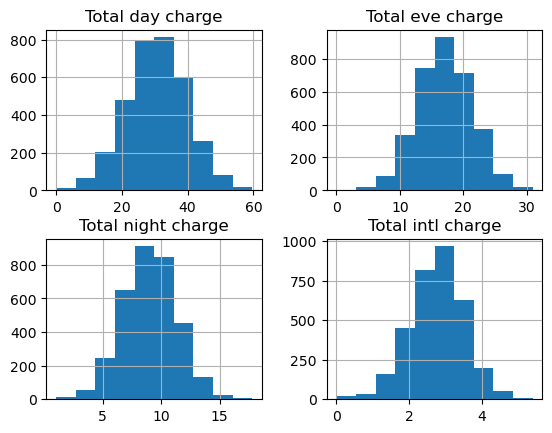

In [14]:
feat = [f for f in df.columns if 'charge' in f]

df[feat].hist()

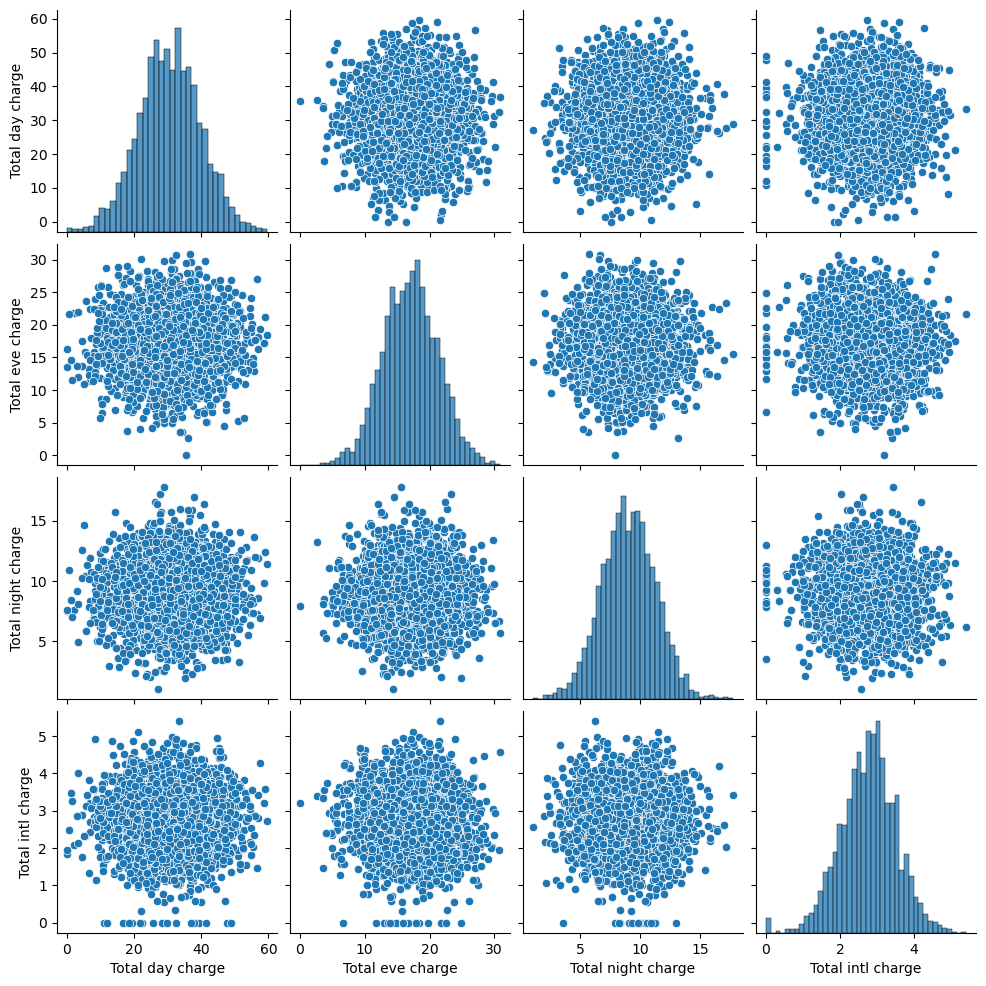

In [15]:
sns.pairplot(df[feat]) #диаграммы рассеячния

In [24]:
df['Churn'].map({False: 'blue', True: 'orange'}).head() #применяем словарь для оттока: голубой - осатлись, оранжевый - ушли

0    blue
1    blue
2    blue
3    blue
4    blue
Name: Churn, dtype: object

In [30]:
df[~df['Churn']].head()#все ущедшие; ~ отрицание (не ушедшие)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


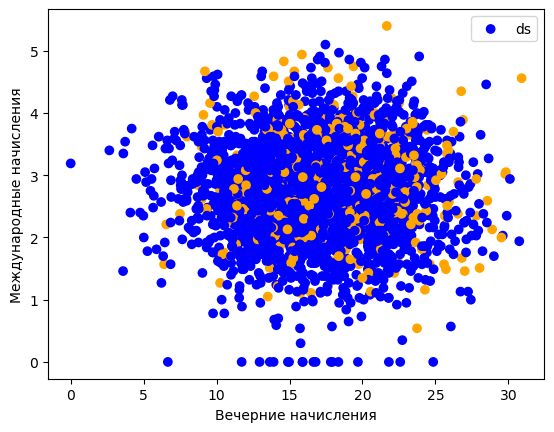

In [27]:
plt.scatter(df['Total eve charge'], df['Total intl charge'],
            color=df['Churn'].map({False: 'blue', True: 'orange'}),
           label='ds')
plt.xlabel('Вечерние начисления')
#plt.xlabel(r'Вечерние начисления $a^2+b^2$')
plt.ylabel('Международные начисления')
plt.legend()

In [1]:
plt.scatter(df[df['Churn']]['Total eve charge'], df[df['Churn']]['Total intl charge'],
            color='orange',  label='churn')
plt.scatter(df[~df['Churn']]['Total eve charge'], df[~df['Churn']]['Total intl charge'],
            color='blue',  label='loyal')
plt.xlabel('Вечерние начисления')
plt.xlabel(r'Вечерние начисления $a^2+b^2$')
plt.ylabel('Международные начисления')
plt.title('Распределение начисление для лояльных/ушедших')
plt.legend()

NameError: name 'plt' is not defined

In [33]:
df.corr()#матрица корреляций

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


<AxesSubplot:>

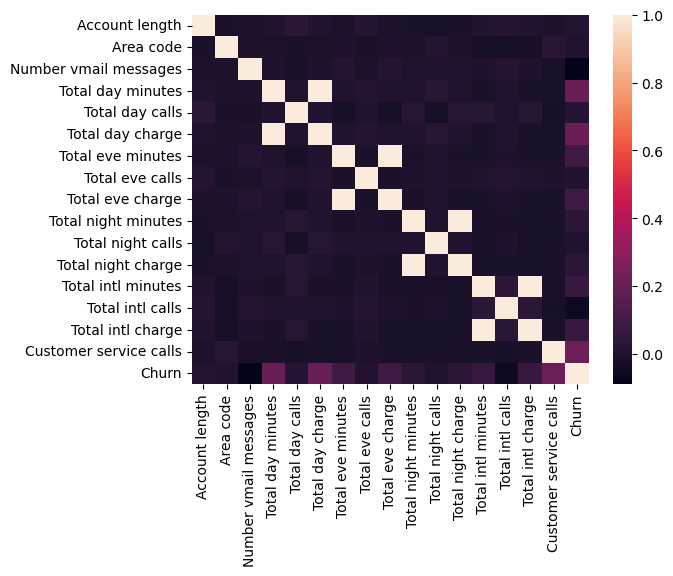

In [34]:
sns.heatmap(df.corr())

In [39]:
feat

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

In [37]:
df.drop(feat, axis=1, inplace=True).head() #удалить столбцы feat, inplace изменяет исходный датафрейм

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [40]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

<AxesSubplot:>

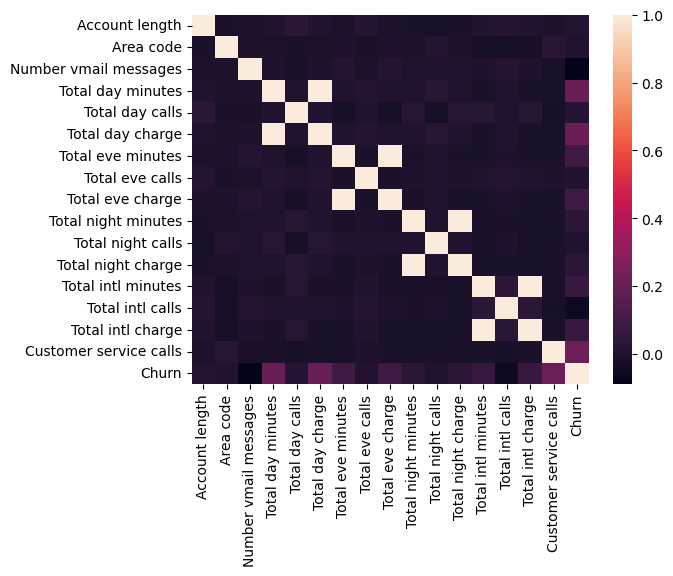

In [48]:
sns.heatmap(df.corr())

In [49]:
df.corr?

## 2.2 Взаимодействие количественного признака икатегориального/бинарного

<AxesSubplot:xlabel='Churn', ylabel='Total day minutes'>

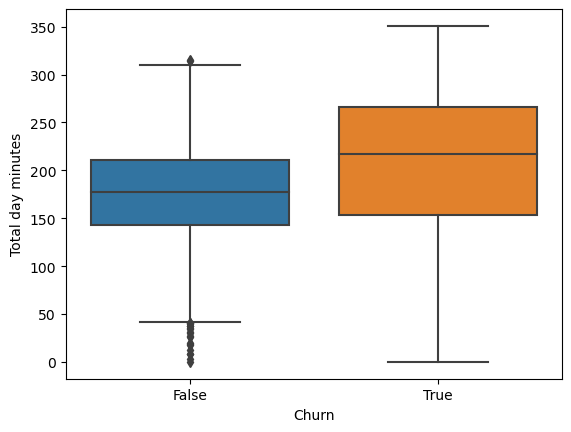

In [51]:
sns.boxplot(x='Churn', y='Total day minutes', data=df)

<AxesSubplot:xlabel='State', ylabel='Total day minutes'>

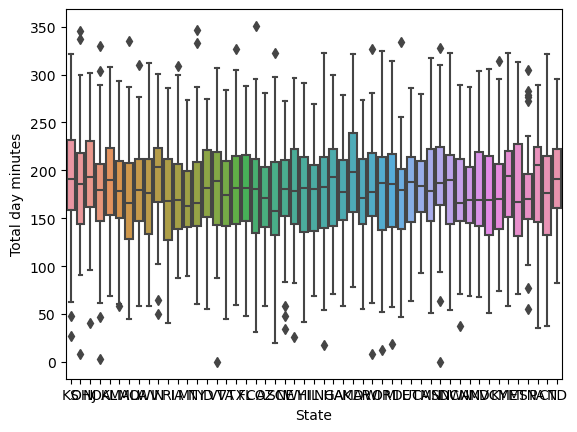

In [52]:
sns.boxplot(x='State', y='Total day minutes', data=df)

<AxesSubplot:xlabel='Churn', ylabel='Total day minutes'>

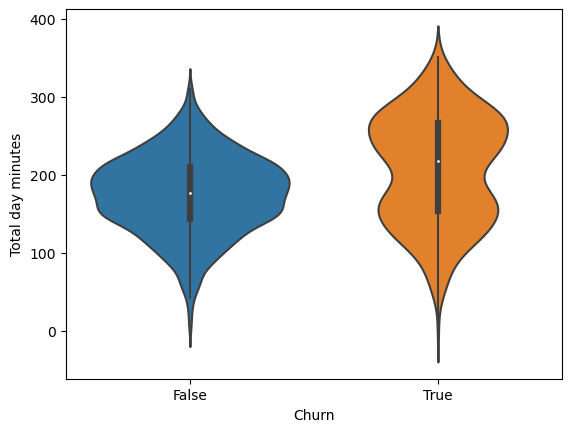

In [53]:
sns.violinplot(x='Churn', y='Total day minutes', data=df) #виолончель

In [54]:
df.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

<AxesSubplot:xlabel='International plan', ylabel='Total day minutes'>

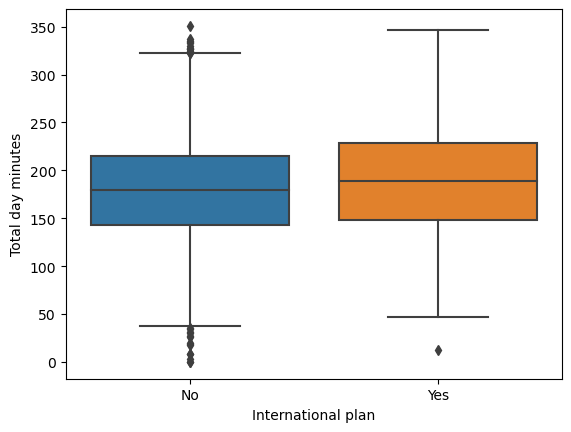

In [55]:
sns.boxplot(x='International plan', y='Total day minutes', data=df)

## 2.3 Катег-катег

In [56]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


<AxesSubplot:xlabel='International plan', ylabel='count'>

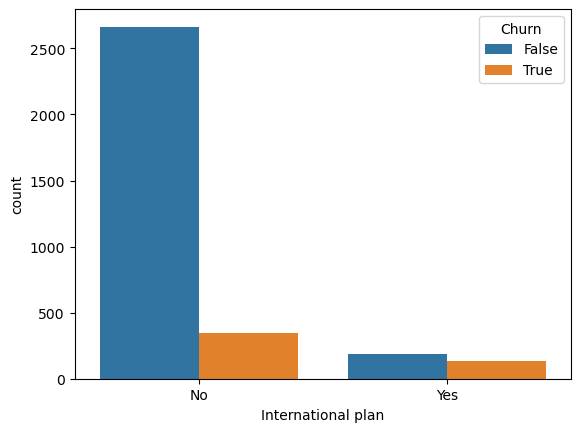

In [57]:
sns.countplot(x='International plan', hue='Churn', data=df)

<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

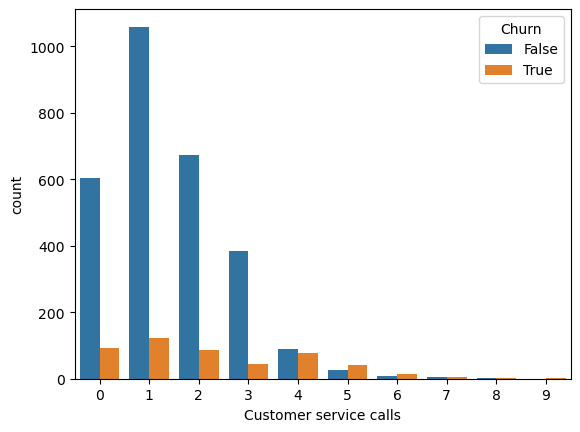

In [58]:
sns.countplot(x='Customer service calls', hue='Churn', data=df)

In [3]:
from sklearn.manifold import TSNE

In [4]:
tsne=TSNE(random_state=0)

In [6]:
df2=df.drop('State', axis=1)   #удаляем строковые признаки

In [7]:
df2['International plan']=df2['International plan'].map({'Yes':1, 'No':0})
df2['Voice mail plan']=df2['Voice mail plan'].map({'Yes':1, 'No':0})

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

In [10]:
%%time
tsne.fit(df2)

C:\Users\ivan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ivan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: total: 1min 45s
Wall time: 14.5 s


TSNE(random_state=0)

In [11]:
tsne_repr = tsne.trans

AttributeError: 'TSNE' object has no attribute 'trans'

In [14]:
tsne.embedding_.shape

(3333, 2)

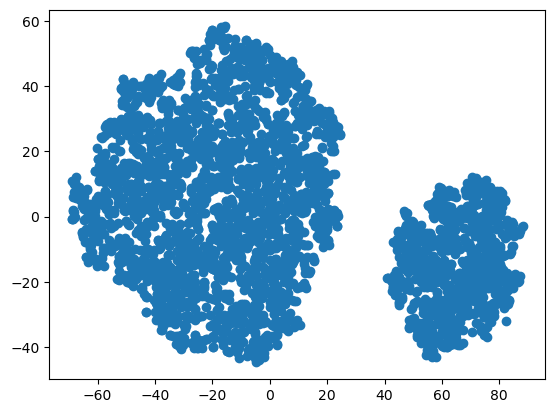

In [15]:
plt.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1]) 
#x - 1столбей, y - 2 ой столбец; отображение из 15-мерного пр-ва на плоскость;
#картинка с целевым признаком - плохо

In [16]:
df2.shape

(3333, 19)

In [18]:
tsne.embedding_[df2['Churn'].values, 0].shape

(483,)

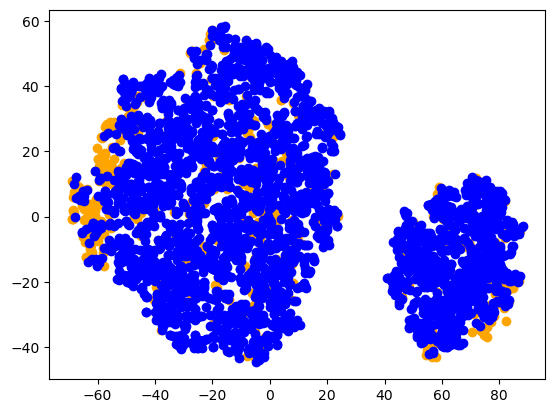

In [20]:
plt.scatter(tsne.embedding_[df2['Churn'].values, 0], tsne.embedding_[df2['Churn'].values, 1], color='orange')#ушедшие
plt.scatter(tsne.embedding_[~df2['Churn'].values, 0], tsne.embedding_[~df2['Churn'].values, 1], color='blue')#лояльные


## Пример  на реалистичных данных

In [22]:
poll_data=pd.read_csv('mlcourse_open_first_survey_parsed.csv')

In [23]:
poll_data.head()

,id,Timestamp,Представьтесь в 2-3 фразах,Работали ли Вы с Jupyter notebooks?,Что Вы ждете от курса?,Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?,"Ладно, посерьезней: согласны ли Вы на обработку персональных данных?","Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)","Чему равна дисперсия равномерного на [0,6] распределения?","Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]",Сколько параметров у нормального распределения?,Сможете написать на Python генератор чисел Фибоначчи?,"Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro",Оцените свой уровень владения GitHub,"Посоветуйте хороший фильм в стиле ""Игра в имитацию"" :)"
0,0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN
2,2,2016/12/05 10:47:07 am GMT+3,"Я Software Engeneer разработчик, активно интер...",Да,Побольше практики на реальных данных (задачах).,basketball,Да,3,3,NaN,2.0,Да,Да,Проф,NaN
3,3,2016/12/05 10:47:22 am GMT+3,Семилетний инженер. Специализируюсь в компьюте...,Да,Глубокого разбора алгоритмов и инструментов.,NaN,Да,3,0.5,-12,2.0,Да,Да,"Пользуюсь ветками, могу что-то смерджить",Король говорит
4,5,2016/12/05 10:58:34 am GMT+3,программист. pl/sql python,Да,Упорядочить знания,футбол,Да,3,3,-12,2.0,Да,уже знаю,"Пользуюсь ветками, могу что-то смерджить",NaN


In [24]:
poll_data.info

<bound method DataFrame.info of         id                     Timestamp  \
0        0  2016/12/05 10:39:59 am GMT+3   
1        1  2016/12/05 10:44:27 am GMT+3   
2        2  2016/12/05 10:47:07 am GMT+3   
3        3  2016/12/05 10:47:22 am GMT+3   
4        5  2016/12/05 10:58:34 am GMT+3   
...    ...                           ...   
2939  3210   2017/09/12 2:32:24 pm GMT+3   
2940  3212   2017/09/12 3:02:01 pm GMT+3   
2941  3213   2017/09/12 3:14:20 pm GMT+3   
2942  3214   2017/09/12 3:41:55 pm GMT+3   
2943  3215   2017/09/12 3:42:00 pm GMT+3   

                             Представьтесь в 2-3 фразах  \
0                                      крутой Developer   
1     Разработчик Navision. Изучаю тему DS для возмо...   
2     Я Software Engeneer разработчик, активно интер...   
3     Семилетний инженер. Специализируюсь в компьюте...   
4                            программист. pl/sql python   
...                                                 ...   
2939            Занимаюсь 

In [25]:
poll_data.shape

(2944, 15)

In [34]:
rename_dic=dict(zip(poll_data.columns, ['id','time', 'intro', 'jupyter', 'expect', 'sport', 'personal', 'math_level', 'quest1',
                            'quest2', 'quest3', 'fib_gen', 'python', 'github', 'movie']))#переименовали столбцы

In [35]:
poll_data.rename(columns=rename_dic, inplace=True)

In [36]:
poll_data.head(2)

,id,time,intro,jupyter,expect,sport,personal,math_level,quest1,quest2,quest3,fib_gen,python,github,movie
0,0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN


In [38]:
#Сколько людей владеют Юпитером
poll_data['jupyter'].value_counts().head()

Да                                                              2071
Нет                                                              766
немного                                                            7
Немного                                                            3
Немного,  недавно начал проходить курс от яндекса на курсоре       2
Name: jupyter, dtype: int64

In [42]:
poll_data['jupyter'].map({'Да': 1, 'Нет': 0}).value_counts() #заменили да на 1, нет на 0, пропуски не показаны

1.0    2071
0.0     766
Name: jupyter, dtype: int64

In [47]:
jupyter_levels=poll_data['jupyter'].map({'Да': 1, 'Нет': 0}).fillna(2).value_counts() #заменили неадекватные ответы на 2

<AxesSubplot:xlabel='jupyter', ylabel='count'>

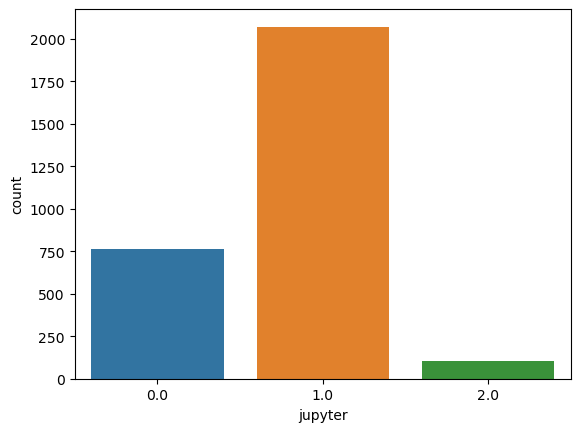

In [50]:
sns.countplot(x=jupyter_levels, data=poll_data)

In [51]:
poll_data.sport.value_counts()

Футбол                                                                                     197
футбол                                                                                     113
Баскетбол                                                                                  113
Плавание                                                                                    94
Хоккей                                                                                      66
                                                                                          ... 
Волейбол и сноуборд, но похоже я не шарю                                                     1
Самбо, Workout, ТА                                                                           1
Хех, баскетбол и ам. футбол. Кстати, очень нравиться анализировать статистику NBA и NFL      1
Уже заполнял анкету. Ищите!                                                                  1
Легкая атлетива                                   

In [53]:
poll_data['quest1'].nunique() #число уникальных значений

107

In [56]:
(poll_data['quest3']==2).dropna().sum() #сколько ответило правильно на вопрос quest3

2519

In [62]:
poll_data['quest3'].shape[0]#сколько всего отвечало

2944

In [63]:
poll_data['quest3'].isnull() #где нет пропусков

0       False
1       False
2       False
3       False
4       False
        ...  
2939    False
2940    False
2941    False
2942    False
2943     True
Name: quest3, Length: 2944, dtype: bool

In [64]:
poll_data['quest3'][~poll_data['quest3'].isnull()].shape[0] #выкинули пропуски

2725

In [65]:
print((poll_data['quest3']==2).dropna().sum()/
      poll_data['quest3'][~poll_data['quest3'].isnull()].shape[0] ) #прцент верно отвтеивших среди отвечавших

0.9244036697247706


In [82]:
all_words_unique = set(np.concatenate(poll_data['intro'].apply(lambda s:
                                                        s.strip().split()).values))

In [67]:
poll_data['intro'].tail() #последние 5

2939              Занимаюсь анализом данных в страховании
2940                         Аналитик в телеком компании.
2941    Занимаюсь сопровождением автоматизированных си...
2942                               разработчик Python, JS
2943    Работал аналитиком в разных сферах, включая e-...
Name: intro, dtype: object

In [68]:
poll_data['intro'].apply(lambda s: s.strip().split()).tail() #убрали пробелы, разделив предложения на слова

2939        [Занимаюсь, анализом, данных, в, страховании]
2940                    [Аналитик, в, телеком, компании.]
2941    [Занимаюсь, сопровождением, автоматизированных...
2942                           [разработчик, Python,, JS]
2943    [Работал, аналитиком, в, разных, сферах,, вклю...
Name: intro, dtype: object

In [69]:
poll_data['intro'].apply(lambda s: s.strip().split()).tail().values #матрица всех слов

array([list(['Занимаюсь', 'анализом', 'данных', 'в', 'страховании']),
       list(['Аналитик', 'в', 'телеком', 'компании.']),
       list(['Занимаюсь', 'сопровождением', 'автоматизированных', 'систем,', 'в', 'т.ч.', 'тех,', 'в', 'которых', 'очень', 'много', 'данных', 'в', 'БД', 'хранится.', 'Люблю', '"покопаться"', 'в', 'данных.', 'Изучаю', 'питон', 'с', '2017', 'года']),
       list(['разработчик', 'Python,', 'JS']),
       list(['Работал', 'аналитиком', 'в', 'разных', 'сферах,', 'включая', 'e-commerce,', 'телеком', 'и', 'онлайн-банкинг.', 'Увлекаюсь', 'программированием'])],
      dtype=object)

In [76]:
import numpy as np
np.concatenate(b) #конкатенация списков

array(['a', 'b', 'c', 'd'], dtype='<U1')

In [75]:
b=np.array([['a', 'b'], ['c','d']])

In [83]:
len(all_words_unique) #число всех уникальных слов

8294

In [85]:
all_words = np.concatenate(poll_data['intro'].apply(lambda s:
                                                        s.strip().split()).values)
print(len(all_words))#число всех слов

26533


In [86]:
pd.Series(list(all_words)).value_counts() #словарь полученных слов

в                  1235
и                   734
на                  409
по                  283
Студент             279
                   ... 
направления,          1
нетехнического        1
Биоинформатик,        1
права.                1
онлайн-банкинг.       1
Length: 8294, dtype: int64

In [89]:
import nltk #библиотека для обработки текста
from nltk.corpus import stopwords #импорт стоп-слов
nltk.download('stopwords') #скачиваем стоп-слова

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ivan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [92]:
stopwords.words('russian') #список русских стоп-слов

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [93]:
len(stopwords.words('russian')) #длина списка стоп-слов

151

In [95]:
words_series = pd.Series(list(all_words))
words_series[~words_series.isin(
    stopwords.words('russian'))].value_counts().head(10) #словарь всех слов с выкинутыми стоп-словами


Студент     279
Работаю     201
курса       187
данных      178
Data        173
Я           166
работаю     157
data        130
машинным    123
ML          122
dtype: int64

# Лекция 3: Классификация


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# отключим всякие предупреждения Anaconda
import warnings

warnings.filterwarnings("ignore")


In [3]:
data=pd.read_csv('telecom_churn.csv')

In [4]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
data.drop(['State', 'Voice mail plan'], axis=1, inplace=True) #выкидыавем нечисловые признаки

In [6]:
data['International plan']=data['International plan'].map({'Yes': 1, 'No': 0})

In [7]:
data.info() #все признаки числовые, кроме целевого - bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Number vmail messages   3333 non-null   int64  
 4   Total day minutes       3333 non-null   float64
 5   Total day calls         3333 non-null   int64  
 6   Total day charge        3333 non-null   float64
 7   Total eve minutes       3333 non-null   float64
 8   Total eve calls         3333 non-null   int64  
 9   Total eve charge        3333 non-null   float64
 10  Total night minutes     3333 non-null   float64
 11  Total night calls       3333 non-null   int64  
 12  Total night charge      3333 non-null   float64
 13  Total intl minutes      3333 non-null   float64
 14  Total intl calls        3333 non-null   

In [8]:
#выделим целевой признак y
y=data['Churn'].astype('int') #переведем в числовой признак
X=data.drop('Churn', axis=1) #матрица характеристик без целеывого признака

In [9]:
X.shape, y.shape

((3333, 17), (3333,))

## Дерево решений

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17) #0.3 - доля тестовой выборки

In [12]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((2333, 17), (1000, 17), (2333,), (1000,))

In [13]:
#объект классификатор-дерево
first_tree=DecisionTreeClassifier(random_state=17)

In [14]:
cross_val_score(first_tree, X_train, y_train, cv=5) #кросс-валидация дерева решений при числе разбиения 5
#5 раз дерево обучилось на 80% данных и полученные числа - доля верных ответов на 20% данных
#5 раз эти 20% разные

array([0.9143469 , 0.91220557, 0.92077088, 0.90772532, 0.91416309])

In [15]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5)) #среднее значение ответов или среднее качество кросс-валидации

0.9138423504976518

## KNN 

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
first_knn=KNeighborsClassifier() #экземпляр класса KNN

In [18]:
np.mean(cross_val_score(first_knn, X_train, y_train, cv=5))  #кросс-валидация KNN при числе разбиения 5

0.8671274043984523

## Настраиваем максимальную глубину max_depth для дерева

In [19]:
from sklearn.model_selection import GridSearchCV #ищем хорощие параметры кросс-валидации по решетке

In [20]:
tree_params = {'max_depth': np.arange(1,11), 'max_features': range(4, 19)} 
# перебираем число параметров от 1 до 10 и максимальное число признаков

In [21]:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1, verbose=True) 
#объект перебора по решетке для дерева, n_job - задействуем все ядра

In [22]:
%%time
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
CPU times: total: 609 ms
Wall time: 4.79 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': range(4, 19)},
             verbose=True)

In [23]:
tree_grid.best_estimator_ #дерево решений с лучшими параметрами

DecisionTreeClassifier(max_depth=6, max_features=15, random_state=17)

In [1]:
tree_grid.best_score_ #лучшее качество на кросс-валидации

NameError: name 'tree_grid' is not defined

In [25]:
tree_grid.best_params_ #наилучшие параметры

{'max_depth': 6, 'max_features': 15}

In [26]:
tree_valid_pred = tree_grid.predict(X_valid) #прогноз значений дерева на отложенной выборке

In [27]:
tree_grid.score(X_valid, y_valid) #оценка дерева на отложенной выборке

0.946

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, tree_valid_pred)  #тоже оценка для дерева на отложенной выборке

0.946

In [29]:
1-np.mean(y) #число лояльных клиентов, т.е. для модели должна быть вот такая доля верных ответов

0.8550855085508551

In [30]:
from sklearn.tree import export_graphviz
export_graphviz(tree_grid.best_estimator_, out_file='telecom_tree.dot', feature_names=X.columns, filled=True) 
#создаем dot файл для дерева решений с наилучшими параметрами

In [31]:
!dot -Tpng telecom_tree.dot -o telecom_tree.png #переводим dot файл в картинку

Error: dot: can't open #переводим: No such file or directory
Error: dot: can't open dot: No such file or directory
Error: dot: can't open файл: No such file or directory
Error: dot: can't open в: No such file or directory
Error: dot: can't open картинку: No such file or directory


In [34]:
second_tree=DecisionTreeClassifier(max_depth=3).fit(X_train, y_train) #дерево решений с глубиной 3
second_tree.score(X_valid, y_valid) #работа на отложенной выборке

0.905

In [36]:
export_graphviz(second_tree, out_file='telecom_tree2.dot', feature_names=X.columns, filled=True) 
!dot -Tpng telecom_tree2.dot -o telecom_tree2.png #переводим dot файл в картинку

Error: dot: can't open #переводим: No such file or directory
Error: dot: can't open dot: No such file or directory
Error: dot: can't open файл: No such file or directory
Error: dot: can't open в: No such file or directory
Error: dot: can't open картинку: No such file or directory


<img scr='telecom_tree.png'>

## Ищем наилучшее число соседей для KNN 

In [56]:
knn_params = {'n_neighbors': [1,2,3,4] + list(range(50, 100, 10))} 
# перебираем число ближайших соседей от 1 до 4 и от 50 до 100 с шагом 10

In [58]:
knn_grid = GridSearchCV(first_knn, knn_params, cv=5, n_jobs=-1)
#объект перебора по решетке для KNN

In [60]:
%%time
knn_grid.fit(X_train, y_train)


CPU times: total: 156 ms
Wall time: 3.55 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 50, 60, 70, 80, 90]})

In [61]:
knn_grid.best_estimator_ #knn с лучшими параметрами

KNeighborsClassifier(n_neighbors=4)

In [62]:
knn_grid.best_score_

0.8658416887998456

In [67]:
knn_params_2 = {'n_neighbors': list(range(1,100,1))} 
# перебираем число ближайших соседей от 1 до 100 с шагом 1
knn_grid_2 = GridSearchCV(first_knn, knn_params_2, cv=5, n_jobs=-1)
knn_grid_2.fit(X_train, y_train)
knn_grid_2.best_estimator_

KNeighborsClassifier(n_neighbors=9)

# Лекция 6: Регрессии

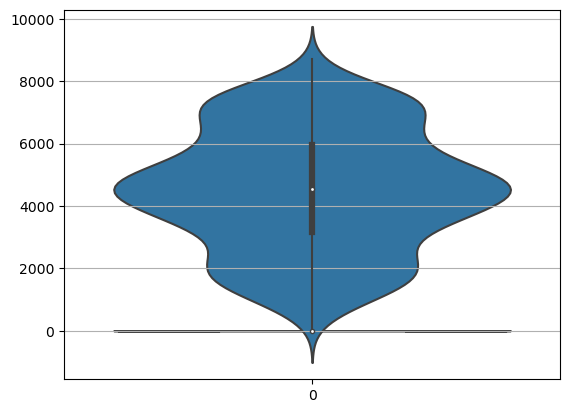

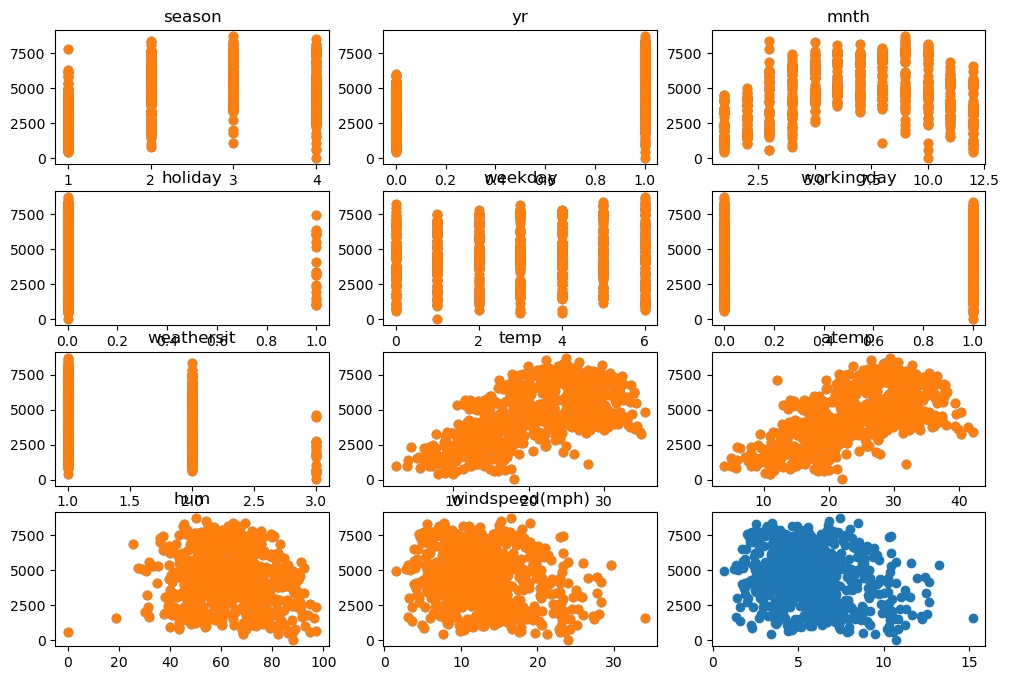

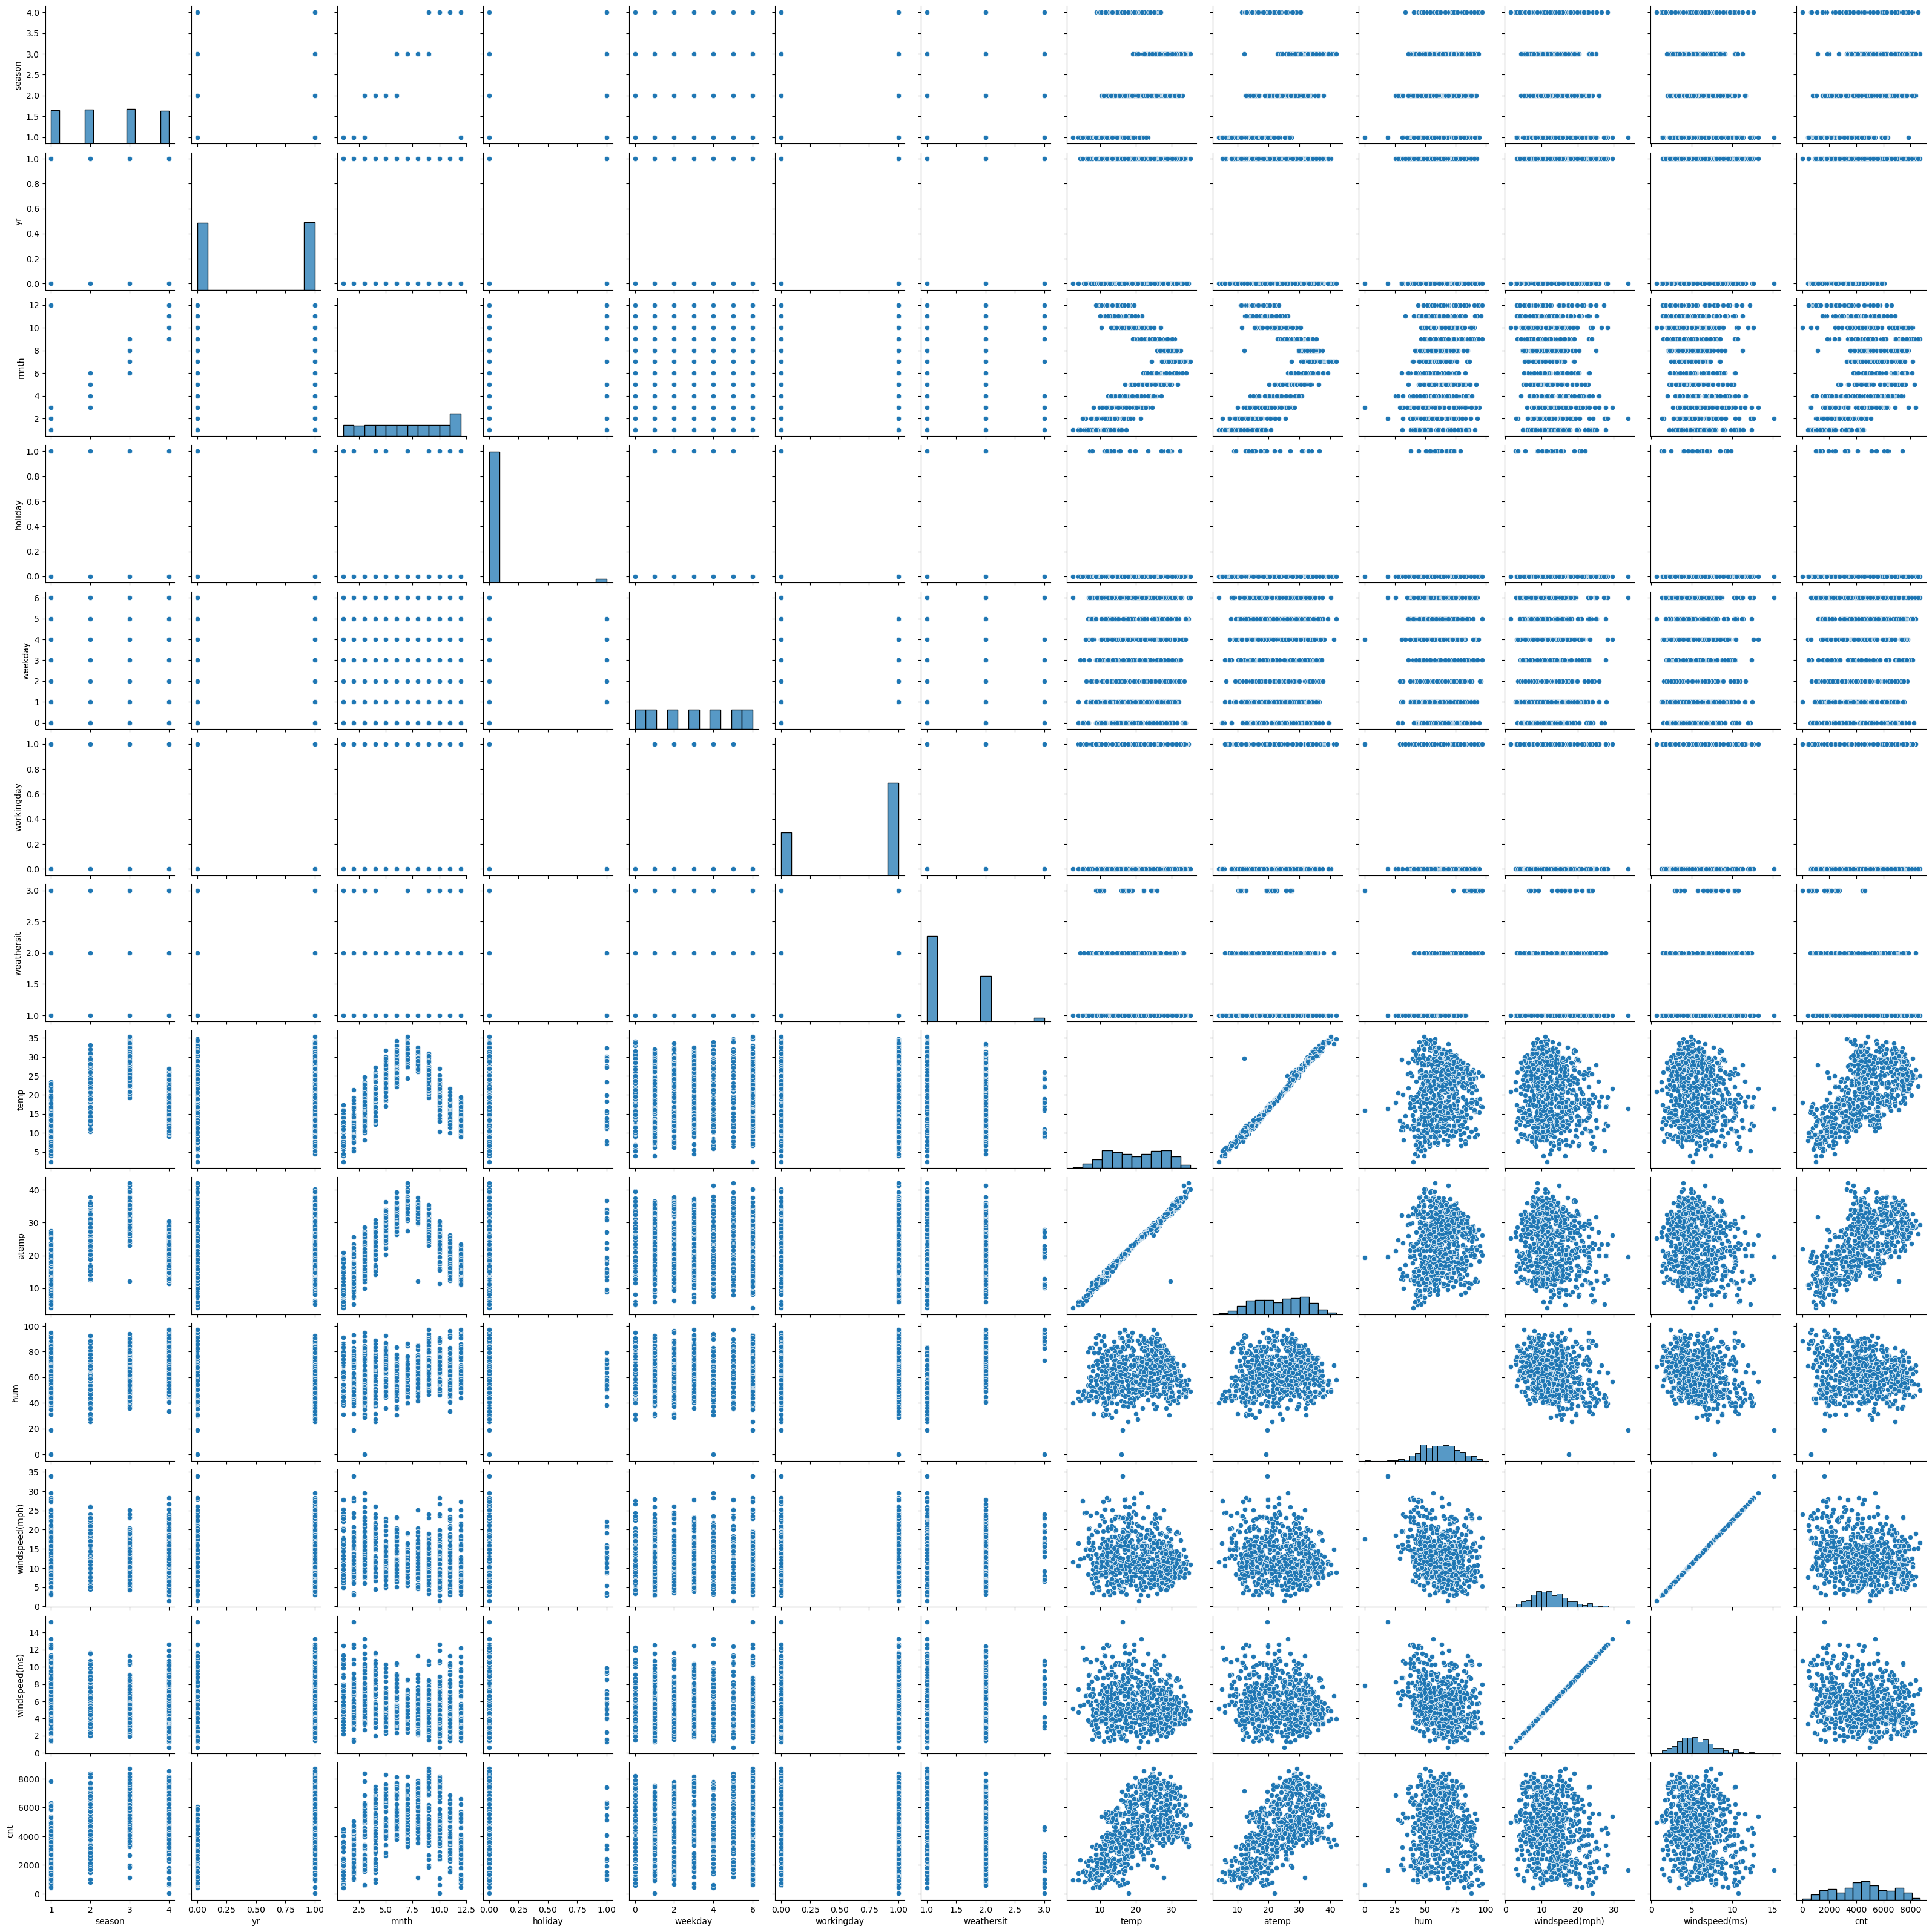

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

data = pd.read_csv("bikes_rent.csv")

data.head()

data.shape

data["cnt"].hist();

data.describe()

plt.rcParams['figure.figsize'] = (12, 8)
sns.violinplot(data['season'])# data['cnt'])

sns.violinplot(data['cnt'])

X_df, y_series = data.drop("cnt", axis=1), data["cnt"]

X_df.shape

plt.figure(figsize=(12, 8))
for i, col in enumerate(X_df.columns):
    plt.subplot(4, 3, i + 1)
    plt.scatter(X_df[col], y_series)
    plt.title(col);

sns.heatmap(data.corr());

for i, col in enumerate(data.columns[:-1]): # i инддекс нумерации
    plt.subplot(4, 3, i+1) #указываем,  где будет рисоваться график на каждой итерации
    plt.scatter(data[col], data['cnt'])

sns.pairplot(data)

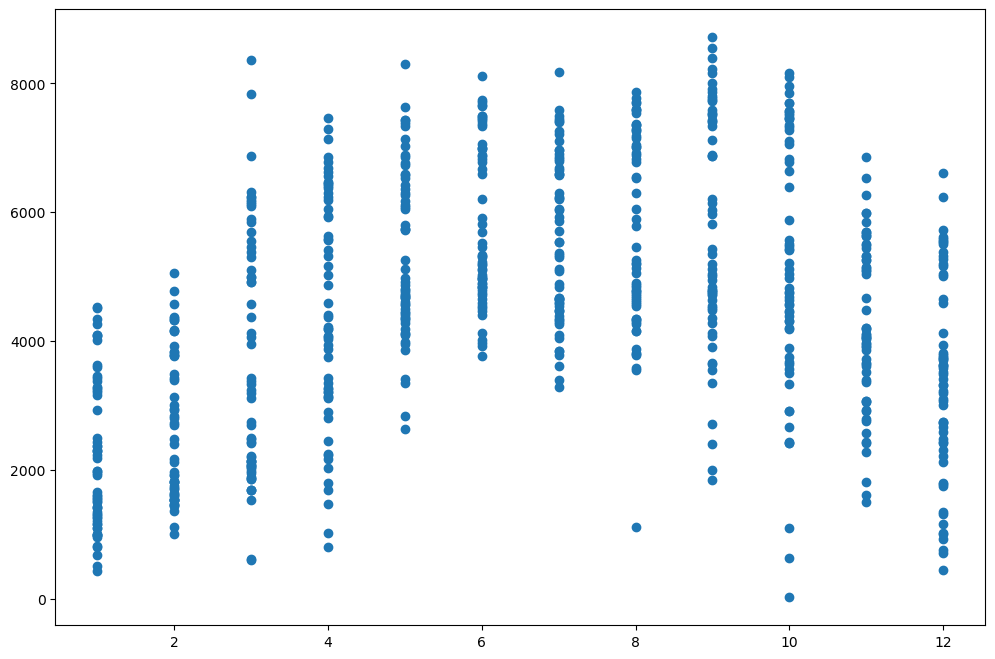

In [2]:
plt.scatter(data.mnth, data.cnt)

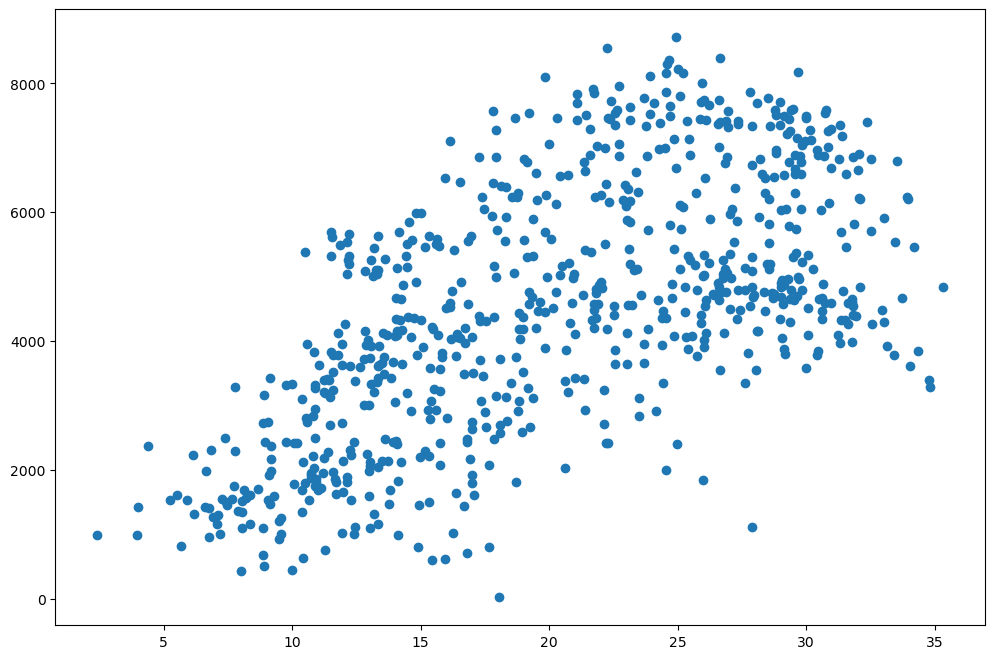

In [3]:
plt.scatter(data.temp, data.cnt)

In [1]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.linear_model import LassoCV, RidgeCV #методы кросс-валидации, заточенные под линейные модели

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [3]:
linreg = LinearRegression() #объект линейный регрессор

In [4]:
lasso = Lasso(random_state=17)

In [5]:
ridge = Ridge(random_state=17)

In [36]:
lasso_cv = LassoCV()

In [40]:
ridge_cv = RidgeCV()

In [14]:
x, y = data.drop('cnt', axis=1).values, data['cnt'].values

In [15]:
train_part_size=int(.7*x.shape[0] )

In [16]:
x_train, x_valid = x[:train_part_size, :], x[train_part_size:, :]
y_train, y_valid = y[:train_part_size], y[train_part_size:]

In [17]:
scaler=StandardScaler() #отмасштабирует признаки

In [18]:
#отмасштабируем обучающую выборку; объект scaler обучится
x_train_scaled = scaler.fit_transform(x_train) 
#отмасштабируем отложенную выборку при помощи подсчитанных срежних и стандартных отклонений 
x_valid_scaled = scaler.transform(x_valid)

In [19]:
linreg.fit(x_train_scaled, y_train) 
#применим объект линейный регрессор к отмасштабированным данным

LinearRegression()

In [20]:
#посчитаем ско между ответами на отложенной выборке и прогнозами 
#на соответствующей отмасштабированной выборке при помощи простого метода наименьших квадратов
mean_squared_error(y_valid, linreg.predict(x_valid_scaled))

1258425.1564227024

In [22]:
#ошибка на количество велосипедов
np.sqrt(mean_squared_error(y_valid, linreg.predict(x_valid_scaled)))

1121.79550561709

<AxesSubplot:>

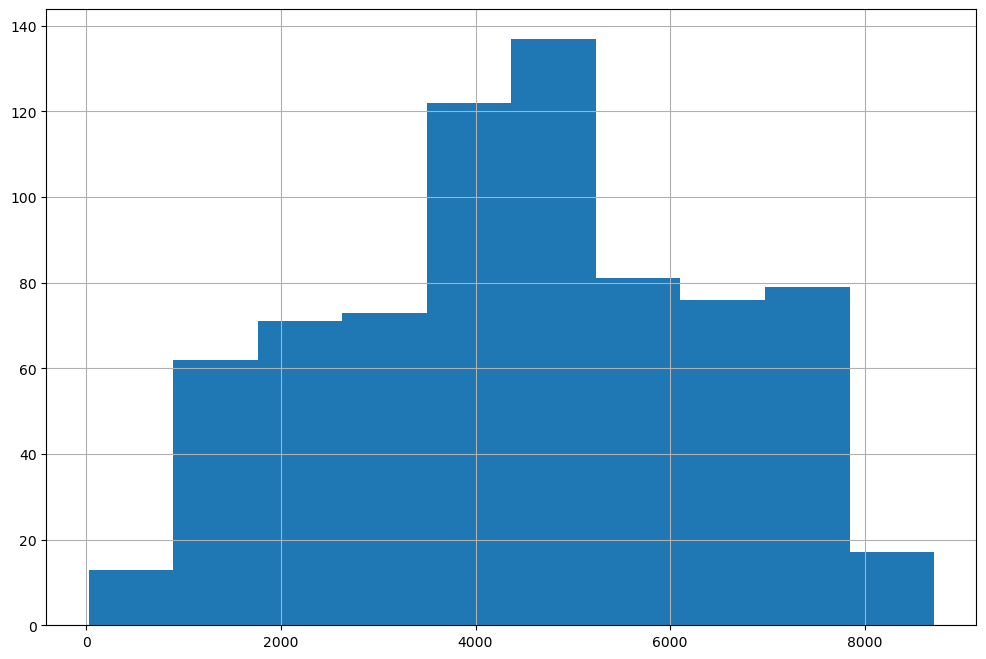

In [23]:
data['cnt'].hist()

In [24]:
#посмортим на коэффициенты линейгной модели
#представим в виде датафрейма, отсортированному по убаыванию по признаку coef
pd.DataFrame(linreg.coef_, data.columns[:-1], 
             columns=['coef']).sort_values(by='coef', ascending=False)
#недостаток модели из-за мультиколлинераности системы

,coef
windspeed(ms),3.050056e+12
yr,9.540709e+02
atemp,8.911622e+02
season,4.048561e+02
weekday,1.037118e+02
temp,6.249529e+01
mnth,3.081159e+01
workingday,1.470123e+01
holiday,-6.757609e+01
hum,-1.589777e+02


In [49]:
#функция, которая принимает модель, обучающую и отложенную части,
#названия признаков из исследуемого датафрейма
#также принимает лес с условием
def train_validate_report(model, x_train_scaled, y_train,
                          x_valid_scaled, y_valid, feature_names,
                          forest=False):
    """
    Для линейных моделей и леса
    """
    model.fit(x_train_scaled, y_train)
    print('MSE=%f' % np.sqrt(mean_squared_error(y_valid, 
                                     model.predict(x_valid_scaled))))
    print('Model coefficiens')
    
    coef=model.feature_importances_ if forest else model.coef_
    coef_name = 'Importance' if forest else 'Coef'#для леса - важность признака, для остальных - коэффициенты
    
    print(pd.DataFrame(coef, feature_names, 
             columns=['coef']).sort_values(by='coef', ascending=False))

In [34]:
#применим функцию к Лассо
train_validate_report(lasso, x_train_scaled, y_train,
                          x_valid_scaled, y_valid, feature_names=data.columns[:-1])

MSE=1120.721409
Model coefficiens
                      coef
yr              952.804560
atemp           877.159813
season          403.416439
weekday         102.643044
temp             75.953962
mnth             29.857599
workingday       14.173377
windspeed(ms)    -0.000000
holiday         -67.073435
hum            -157.547615
windspeed(mph) -187.341353
weathersit     -293.177257


In [37]:
train_validate_report(lasso_cv, x_train_scaled, y_train,
                          x_valid_scaled, y_valid, feature_names=data.columns[:-1])

MSE=1120.743661
Model coefficiens
                      coef
yr              951.135002
atemp           883.344030
season          403.009581
weekday         101.892690
temp             69.238981
mnth             28.608639
workingday       13.478682
windspeed(ms)    -0.000000
holiday         -66.360460
hum            -156.248289
windspeed(mph) -186.267734
weathersit     -293.016582


In [38]:
lasso_cv.alphas_ #параметры значения альфа, которые перебирает лассо_cv

array([1.00067072e+03, 9.33228862e+02, 8.70332360e+02, 8.11674872e+02,
       7.56970702e+02, 7.05953410e+02, 6.58374513e+02, 6.14002274e+02,
       5.72620576e+02, 5.34027866e+02, 4.98036175e+02, 4.64470204e+02,
       4.33166466e+02, 4.03972496e+02, 3.76746102e+02, 3.51354676e+02,
       3.27674547e+02, 3.05590379e+02, 2.84994610e+02, 2.65786927e+02,
       2.47873778e+02, 2.31167915e+02, 2.15587971e+02, 2.01058063e+02,
       1.87507423e+02, 1.74870050e+02, 1.63084394e+02, 1.52093052e+02,
       1.41842489e+02, 1.32282780e+02, 1.23367363e+02, 1.15052816e+02,
       1.07298641e+02, 1.00067072e+02, 9.33228862e+01, 8.70332360e+01,
       8.11674872e+01, 7.56970702e+01, 7.05953410e+01, 6.58374513e+01,
       6.14002274e+01, 5.72620576e+01, 5.34027866e+01, 4.98036175e+01,
       4.64470204e+01, 4.33166466e+01, 4.03972496e+01, 3.76746102e+01,
       3.51354676e+01, 3.27674547e+01, 3.05590379e+01, 2.84994610e+01,
       2.65786927e+01, 2.47873778e+01, 2.31167915e+01, 2.15587971e+01,
      

In [39]:
train_validate_report(ridge, x_train_scaled, y_train,
                          x_valid_scaled, y_valid, feature_names=data.columns[:-1])

MSE=1119.560520
Model coefficiens
                      coef
yr              954.075878
atemp           730.747340
season          400.114172
temp            221.406072
weekday         103.198680
mnth             34.687740
workingday       15.334339
holiday         -69.046689
windspeed(ms)   -95.819798
windspeed(mph)  -95.819798
hum            -157.702520
weathersit     -293.899386


In [41]:
train_validate_report(ridge_cv, x_train_scaled, y_train,
                          x_valid_scaled, y_valid, feature_names=data.columns[:-1])

MSE=1118.903543
Model coefficiens
                      coef
yr              934.401985
atemp           534.482125
temp            410.485392
season          375.585733
weekday         100.838401
mnth             48.142392
workingday       16.165284
holiday         -70.019251
windspeed(ms)   -97.770430
windspeed(mph)  -97.770430
hum            -155.174377
weathersit     -291.035853


In [55]:
forest = RandomForestRegressor(random_state=17, n_estimators = 1000)

In [56]:
train_validate_report(forest, x_train_scaled, y_train,
                          x_valid_scaled, y_valid, feature_names=data.columns[:-1], forest = True)
#важность признаков для леса

MSE=1049.111010
Model coefficiens
                    coef
temp            0.279874
atemp           0.262240
yr              0.199538
hum             0.069234
season          0.062650
weathersit      0.031276
mnth            0.027512
weekday         0.020322
windspeed(ms)   0.019894
windspeed(mph)  0.019550
workingday      0.005170
holiday         0.002740


In [57]:
#для леса не важны отмасшьабированные признаки, поэтому можну использовать обычные тестовые выборки
train_validate_report(forest, x_train, y_train,
                          x_valid, y_valid, feature_names=data.columns[:-1], forest = True)

MSE=1049.050779
Model coefficiens
                    coef
temp            0.279874
atemp           0.262240
yr              0.199538
hum             0.069234
season          0.062650
weathersit      0.031276
mnth            0.027512
weekday         0.020322
windspeed(ms)   0.019894
windspeed(mph)  0.019550
workingday      0.005170
holiday         0.002740


# Лекция 8: Обучение на больших выборках

In [5]:
from sklearn.datasets import load_files #будем подгружать файлы с данными
import os

In [74]:
PATH_TO_DATA = 'D:\python\DATAS\imdb_reviews'

In [7]:
!du-hs $PATH_DATA/train #размер тренировочной выборки
!du-hs $PATH_DATA/test #размер тестовой выборки

"du-hs" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"du-hs" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [75]:
train_reviews = load_files(os.path.join(PATH_TO_DATA, 'train'))

In [76]:
test_reviews = load_files(os.path.join(PATH_TO_DATA, 'test'))

In [77]:
len(train_reviews.data) #длина выборки

25000

In [78]:
train_reviews.data[0] #текст конкретного отзыва

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

In [79]:
train_reviews.target[0] #метка отзыва, хороший

1

In [80]:
train_reviews.data[576] 

b'An actor asks, "What\'s my motivation?," to understand his or her character. After viewing this this "docudrama," this vague and haphazard farce, a viewer wonders what anyone\'s motivation was.<br /><br />This inept offspring of daytime T.V. (the Oprah show) missed by a mile a great opportunity to explore weighty issues.<br /><br />Its characters were all shallow and superficial, its story line far less socially redeeming than a "Simpsons" episode. It gratuitously portrayed investigating police as unprofessional and incompetent. It failed to offer why the court might treat the main character, a female child molester, so differently than it would have a male perp.<br /><br />Why did this unrepentant woman begin "grooming" her second grade student, beginning an affair with him when he returned to her sixth grade class? Why did the boy\'s mother testify in her behalf? The simple answer is overwhelming narcissism, plus generational rationalization and greed. The movie gave no hint of tha

In [81]:
train_reviews.target[576] 

0

In [82]:
import pandas as pd 
targets = pd.DataFrame(train_reviews.target)
targets.value_counts()

0    12500
1    12500
dtype: int64

## BOW - Bag of words

In [34]:
#работаем с разреженными матрицами; csr - compressed sparse row
from scipy.sparse import csr_matrix
import numpy as np

In [36]:
#пример с игрушечной матрицей
a=np.zeros([5,5])
a[0, 3] = 1
a[4, 4] = 6
a[2, 2] = 5
a[3, 1] = 4
a[3, 2] = 2
a[4, 4] = 6
a[1, 1] = 7
a

array([[0., 0., 0., 1., 0.],
       [0., 7., 0., 0., 0.],
       [0., 0., 5., 0., 0.],
       [0., 4., 2., 0., 0.],
       [0., 0., 0., 0., 6.]])

In [38]:
pd.DataFrame(a, columns=['apple', 'wax', 'sadness', 'luck', 'girl'])
#матрица означает, сколько раз конкретное слово вошло в отзыв

,apple,wax,sadness,luck,girl
0,0.0,0.0,0.0,1.0,0.0
1,0.0,7.0,0.0,0.0,0.0
2,0.0,0.0,5.0,0.0,0.0
3,0.0,4.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,6.0


In [40]:
#разреженный формат матрицы a
b=csr_matrix(a)
b

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [41]:
b.todense() #возврещаем матрицу в плотную

matrix([[0., 0., 0., 1., 0.],
        [0., 7., 0., 0., 0.],
        [0., 0., 5., 0., 0.],
        [0., 4., 2., 0., 0.],
        [0., 0., 0., 0., 6.]])

In [42]:
b.nonzero() #индексы соответственно по строчкам и стодбцам с ненулевыми значениями

(array([0, 1, 2, 3, 3, 4], dtype=int32),
 array([3, 1, 2, 1, 2, 4], dtype=int32))

In [43]:
b.data #сами ненулевые значения

array([1., 7., 5., 4., 2., 6.])

In [44]:
#раелизация мешка слов в sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
#индексируем все слова
cv = CountVectorizer()
X_train_sparse = cv.fit_transform(train_reviews.data)

In [84]:
cv.vocabulary_ #полученный словарь из отзывов

{'zero': 74609,
 'day': 16697,
 'leads': 38088,
 'you': 74324,
 'to': 67125,
 'think': 66526,
 'even': 22718,
 're': 53749,
 'why': 72965,
 'two': 68769,
 'boys': 8714,
 'young': 74334,
 'men': 42153,
 'would': 73714,
 'do': 19326,
 'what': 72703,
 'they': 66474,
 'did': 18292,
 'commit': 13616,
 'mutual': 44618,
 'suicide': 64223,
 'via': 71205,
 'slaughtering': 60766,
 'their': 66367,
 'classmates': 12694,
 'it': 34683,
 'captures': 10582,
 'must': 44560,
 'be': 6334,
 'beyond': 7145,
 'bizarre': 7518,
 'mode': 43375,
 'of': 46680,
 'being': 6663,
 'for': 25450,
 'humans': 32047,
 'who': 72904,
 'have': 30118,
 'decided': 16929,
 'withdraw': 73343,
 'from': 26180,
 'common': 13635,
 'civility': 12582,
 'in': 33004,
 'order': 47196,
 'define': 17169,
 'own': 47889,
 'world': 73651,
 'coupled': 15137,
 'destruction': 17920,
 'br': 8724,
 'is': 34585,
 'not': 46050,
 'perfect': 49221,
 'movie': 44147,
 'but': 9881,
 'given': 27619,
 'money': 43572,
 'time': 66925,
 'the': 66339,
 'filmm

In [85]:
len(cv.vocabulary_) #длина словаря

74849

In [86]:
#преобразуем тестовую выборку; новые слова из тестовой выборки игнорируем
X_test_sparse = cv.transform(test_reviews.data)

In [87]:
X_train_sparse.shape, X_test_sparse.shape

((25000, 74849), (25000, 74849))

In [88]:
X_train_sparse

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3445861 stored elements in Compressed Sparse Row format>

In [89]:
10359806/(75000*124255) #доля ненулевых чисел в выборке

0.001111671535686022

In [90]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score

In [91]:
y_train, y_test = train_reviews.target, test_reviews.target

In [92]:
np.bincount(y_train), np.bincount(y_test) #распределение меток

(array([12500, 12500], dtype=int64), array([12500, 12500], dtype=int64))

In [93]:
logit = LogisticRegression(random_state=17, n_jobs=-1, solver='lbfgs') 
#lbfgs солвер для оптимального распараллеливания процесса\
sgd_logit = SGDClassifier(random_state=17, n_jobs=-1)

In [94]:
#рекомендуемое число итераций роходов по выборке
10**6/X_train_sparse.shape[0]

40.0

In [95]:
logit.fit(X_train_sparse, y_train)

LogisticRegression(n_jobs=-1, random_state=17)

In [96]:
sgd_logit.fit(X_train_sparse, y_train)

SGDClassifier(n_jobs=-1, random_state=17)

In [97]:
#предсказывание на тестовой выборке logit
accuracy_score(y_test, logit.predict(X_test_sparse))

0.86336

In [98]:
#предсказывание на тестовой выборке sgd_logit
accuracy_score(y_test, sgd_logit.predict(X_test_sparse))

0.85616

In [107]:
#добавим биграммы, т.е. перебираем соседние пары слов
cv2 = CountVectorizer(ngram_range=(1,2))
X2_train_sparse = cv2.fit_transform(train_reviews.data)

In [100]:
cv2.vocabulary_ 

{'zero': 1512013,
 'day': 338102,
 'leads': 750958,
 'you': 1505684,
 'to': 1344321,
 'think': 1323575,
 'even': 433838,
 're': 1060857,
 'why': 1468368,
 'two': 1379425,
 'boys': 195966,
 'young': 1507527,
 'men': 826158,
 'would': 1495529,
 'do': 377248,
 'what': 1452309,
 'they': 1320079,
 'did': 360938,
 'commit': 289039,
 'mutual': 871902,
 'suicide': 1248069,
 'via': 1414989,
 'slaughtering': 1181047,
 'their': 1309193,
 'classmates': 273518,
 'it': 697185,
 'captures': 237559,
 'must': 871029,
 'be': 146209,
 'beyond': 172628,
 'bizarre': 178463,
 'mode': 843072,
 'of': 914447,
 'being': 162100,
 'for': 499356,
 'humans': 638861,
 'who': 1463784,
 'have': 587360,
 'decided': 343363,
 'withdraw': 1483967,
 'from': 517404,
 'common': 289312,
 'civility': 271010,
 'in': 653396,
 'order': 954262,
 'define': 345812,
 'own': 969039,
 'world': 1492678,
 'coupled': 313554,
 'destruction': 355951,
 'br': 196310,
 'is': 686540,
 'not': 900379,
 'perfect': 988774,
 'movie': 858752,
 'but':

In [101]:
len(cv2.vocabulary_)

1513832

In [102]:
X2_test_sparse = cv2.transform(test_reviews.data)

In [108]:
X2_train_sparse.shape, X2_test_sparse.shape

((25000, 1513832), (25000, 1513832))

In [106]:
logit2 = LogisticRegression(random_state=17, n_jobs=-1, solver='lbfgs') 
#lbfgs солвер для оптимального распараллеливания процесса\
sgd_logit2 = SGDClassifier(random_state=17, n_jobs=-1)

In [109]:
logit2.fit(X2_train_sparse, y_train)

LogisticRegression(n_jobs=-1, random_state=17)

In [110]:
sgd_logit2.fit(X2_train_sparse, y_train)

SGDClassifier(n_jobs=-1, random_state=17)

In [112]:
accuracy_score(y_test, logit2.predict(X2_test_sparse))

0.8964

In [113]:
accuracy_score(y_test, sgd_logit2.predict(X2_test_sparse))

0.88852

## Хеширование

In [117]:
hash('be very nice')%10**6

368319

In [121]:
hash('be    very nice')

5655956123709065447